<a href="https://www.suss.edu.sg/courses/detail/anl252?urlname=bachelor-of-science-in-finance-with-minor-ftfnce"><img src = "https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" width = 200> <img src = "https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1563832500/sql3_piw8ih.png" width = 200> </a>

<h1 align=center><font size = 5>Analysis with SQL and Python</font></h1>

<h1 align=center><font size = 4> Munish Kumar </font></h1>
<h1 align=center><font size = 3> Semester 2 2021 </font></h1>

# Introduction

This notebook is a very short practice on some basics of SQL. We will:
1. Do some basic data wrangling of a data set from the City of Chicago. There will be 2 parts to this. 
 - Part (A) looks at the Social-Domographic Aspects
 - Part (B) will look at the Crime Rate.
 
*Can we draw conclusions on how they are related?

1. Practice your SQL skills 

## Problem Statement:
### Selected Socioeconomic Indicators in Chicago

The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.I have downloaded it here for your convinience. The dataset has the following variables:

* **Community Area Number** ('ca'): Used to uniquely identify each row of the dataset

* **Community Area Name** ('community_area_name'): The name of the region in the city of Chicago 

* **Percent of Housing Crowded** ('percent_of_housing_crowded'): Percent of occupied housing units with more than one person per room

* **Percent Households Below Poverty** ('percent_households_below_poverty'): Percent of households living below the federal poverty line

* **Percent Aged 16+ Unemployed** ('percent_aged_16_unemployed'): Percent of persons over the age of 16 years that are unemployed

* **Percent Aged 25+ without High School Diploma** ('percent_aged_25_without_high_school_diploma'): Percent of persons over the age of 25 years without a high school education

* **Percent Aged Under 18 or Over 64** ('percent_aged_under_18_or_over_64'):Percent of population under 18 or over 64 years of age: (ie. dependents)

* **Per Capita Income** ('per_capita_income_'): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

* **Hardship Index** ('hardship_index'): Score that incorporates each of the six selected socioeconomic indicators

Lets look at the variables in the socioeconomic indicators dataset and do some basic analysis with Python.

### Data-Prep: Connect to the database
Let us first load the SQL extension and establish a connection with the database, but we are going to do it a bit differently and use SQL Magic. 

Magic commands are a set of convenient functions in Jupyter Notebooks that are designed to solve some of the common problems in standard data analysis. You can see all of the available magics with the help of %lsmagic.

In [1]:
# Uncomment to install this; you only need to do this once the very first time to write this code
#!pip install ipython-sql

In [2]:
%load_ext sql

In [3]:
%sql sqlite://

##### Lets do a simple test to see if we can create a table 

1. Note the %%sql. 
 - A single '%' symbol is for 1 SQL line of code
 - Double '%%' means that the block itself is entirely SQL code
 

2. Note also that you must end each statement with a ';' symbol

In [4]:
%%sql   
CREATE TABLE TUTOR(firstname varchar(50),lastname varchar(50));  
INSERT INTO TUTOR VALUES('Munish','Kumar');  
INSERT INTO TUTOR VALUES('Matthew','McDonald');

 * sqlite://
Done.
1 rows affected.
1 rows affected.


[]

In [5]:
 %sql SELECT * from TUTOR;  

 * sqlite://
Done.


firstname,lastname
Munish,Kumar
Matthew,McDonald


#### 1. Store the dataset in a Database

Unlike what is written in your notes, we are going to use something called sql Alchemy (https://www.sqlalchemy.org/)

In [6]:
import pandas
df_chicago = pandas.read_csv('Chicago_Dataset_2014.csv')
print(df_chicago.head(2))

    ca community_area_name  percent_of_housing_crowded  \
0  1.0         Rogers Park                         7.7   
1  2.0          West Ridge                         7.8   

   percent_households_below_poverty  percent_aged_16_unemployed  \
0                              23.6                         8.7   
1                              17.2                         8.8   

   percent_aged_25_without_high_school_diploma  \
0                                         18.2   
1                                         20.8   

   percent_aged_under_18_or_over_64  per_capita_income_  hardship_index  
0                              27.5               23939            39.0  
1                              38.5               23040            46.0  


In [7]:
#importing sql library
from sqlalchemy import create_engine

# create a referrence for sql library
# sqlite:////Users/ABC/Desktop/yourdatabase.sqlite –> This can be used to specify a database in a 
# specific location. Also if the database file doesn’t exist it will be initiated.

cnx = create_engine(r'sqlite:////Users/mkumar/Documents/Python_Scripts/chicago_socioeconomic_data.sqlite', 
                    echo = False)

# attach the data frame to the sql with a name of the table
df_chicago.to_sql('chicago_socioeconomic_data', con=cnx, index=False)

Now lets point to where our database is kept using

*sqlite:///yourdatabase.sqlite* –> This will connect to a database file in the same working directory.

In [8]:
%sql sqlite:////Users/mkumar/Documents/Python_Scripts/chicago_socioeconomic_data.sqlite

##### You can verify that the table creation was successful by making a basic query like:

In [9]:
%sql SELECT * from chicago_socioeconomic_data limit 5;

   sqlite://
 * sqlite:////Users/mkumar/Documents/Python_Scripts/chicago_socioeconomic_data.sqlite
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


------------------------------------
------------------------------------
## Part A - Socio-Economic Indicators for Chicago

### Problem 1

##### How many rows are in the dataset?

In [10]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data;

   sqlite://
 * sqlite:////Users/mkumar/Documents/Python_Scripts/chicago_socioeconomic_data.sqlite
Done.


COUNT(*)
78


### Problem 2

##### How many community areas in Chicago have a hardship index greater than 50.0?

In [11]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50.0;

   sqlite://
 * sqlite:////Users/mkumar/Documents/Python_Scripts/chicago_socioeconomic_data.sqlite
Done.


COUNT(*)
38


### Problem 3

##### What is the maximum value of hardship index in this dataset?

In [12]:
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

   sqlite://
 * sqlite:////Users/mkumar/Documents/Python_Scripts/chicago_socioeconomic_data.sqlite
Done.


MAX(hardship_index)
98.0


### Problem 4

##### Which community area which has the highest hardship index?


In [13]:
%%sql 
select community_area_name from chicago_socioeconomic_data 
where hardship_index = (
    select max(hardship_index) from chicago_socioeconomic_data 
);

   sqlite://
 * sqlite:////Users/mkumar/Documents/Python_Scripts/chicago_socioeconomic_data.sqlite
Done.


community_area_name
Riverdale


### Problem 5

##### Which Chicago community areas have per-capita incomes greater than $60,000?

In [14]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

   sqlite://
 * sqlite:////Users/mkumar/Documents/Python_Scripts/chicago_socioeconomic_data.sqlite
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


### Problem 6

##### Create a scatter plot using the variables `per_capita_income_` and `hardship_index`. Explain the correlation between the two variables.

   sqlite://
 * sqlite:////Users/mkumar/Documents/Python_Scripts/chicago_socioeconomic_data.sqlite
Done.


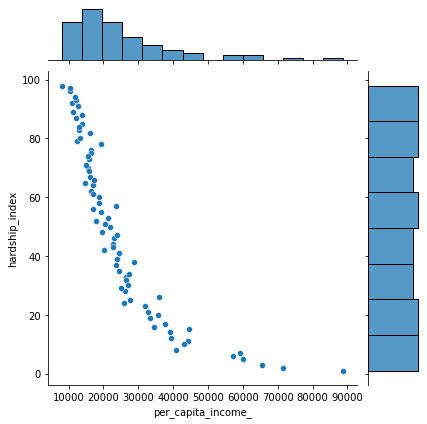

In [15]:
# !pip install seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

You can see that as Per Capita Income rises as the Hardship Index decreases. We see that the points on the scatter plot are somewhat closer to a straight line in the negative direction, so we have a negative correlation between the two variables. 

------------------------------------
------------------------------------
## Part B - Crime in Chicago

#### As we did before, lets create the database

In [16]:
df_crime_chicago = pandas.read_csv('Chicago_Crime_Data.csv')
print(df_crime_chicago.head(2))

        ID CASE_NUMBER                    DATE                     BLOCK IUCR  \
0  3512276    HK587712  08/28/2004 05:50:56 PM        047XX S KEDZIE AVE  890   
1  3406613    HK456306  06/26/2004 12:40:00 PM  009XX N CENTRAL PARK AVE  820   

  PRIMARY_TYPE     DESCRIPTION LOCATION_DESCRIPTION  ARREST  DOMESTIC  ...  \
0        THEFT   FROM BUILDING   SMALL RETAIL STORE   False     False  ...   
1        THEFT  $500 AND UNDER                OTHER   False     False  ...   

   WARD  COMMUNITY_AREA_NUMBER  FBICODE  X_COORDINATE Y_COORDINATE  YEAR  \
0  14.0                   58.0        6     1155838.0    1873050.0  2004   
1  27.0                   23.0        6     1152206.0    1906127.0  2004   

                UPDATEDON  LATITUDE  LONGITUDE                       LOCATION  
0  02/10/2018 03:50:01 PM  41.80744 -87.703956    (41.8074405, -87.703955849)  
1  02/28/2018 03:56:25 PM  41.89828 -87.716406  (41.898279962, -87.716405505)  

[2 rows x 22 columns]


Make sure you create the engine

In [17]:
cnx = create_engine(r'sqlite:////Users/mkumar/Documents/Python_Scripts/chicago_crime_data.sqlite', 
                    echo = False)

# attach the data frame to the sql with a name of the table
df_crime_chicago.to_sql('chicago_crime_data', con=cnx, index=False)

Point to where the database is kept

In [18]:
%sql sqlite:////Users/mkumar/Documents/Python_Scripts/chicago_crime_data.sqlite

### Problem 7
##### Find the total number of crimes recorded in the CRIME table

In [19]:
# Rows in Crime table
%sql select count(id) from CHICAGO_CRIME_DATA

   sqlite://
 * sqlite:////Users/mkumar/Documents/Python_Scripts/chicago_crime_data.sqlite
   sqlite:////Users/mkumar/Documents/Python_Scripts/chicago_socioeconomic_data.sqlite
Done.


count(id)
533


### Problem 8

##### Retrieve first 10 rows from the CRIME table

In [20]:
%sql SELECT * from CHICAGO_CRIME_DATA limit 10

   sqlite://
 * sqlite:////Users/mkumar/Documents/Python_Scripts/chicago_crime_data.sqlite
   sqlite:////Users/mkumar/Documents/Python_Scripts/chicago_socioeconomic_data.sqlite
Done.


ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,UPDATEDON,LATITUDE,LONGITUDE,LOCATION
3512276,HK587712,08/28/2004 05:50:56 PM,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,0,0,911,9,14.0,58.0,6,1155838.0,1873050.0,2004,02/10/2018 03:50:01 PM,41.8074405,-87.70395585,"(41.8074405, -87.703955849)"
3406613,HK456306,06/26/2004 12:40:00 PM,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,0,0,1112,11,27.0,23.0,6,1152206.0,1906127.0,2004,02/28/2018 03:56:25 PM,41.89827996,-87.71640551,"(41.898279962, -87.716405505)"
8002131,HT233595,04/04/2011 05:45:00 AM,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,0,0,221,2,3.0,38.0,6,1177436.0,1876313.0,2011,02/10/2018 03:50:01 PM,41.81593313,-87.62464213,"(41.815933131, -87.624642127)"
7903289,HT133522,12/30/2010 04:30:00 PM,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,0,0,423,4,7.0,46.0,6,1194622.0,1850125.0,2010,02/10/2018 03:50:01 PM,41.74366532,-87.56246276,"(41.743665322, -87.562462756)"
10402076,HZ138551,02/02/2016 07:30:00 PM,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,0,0,831,8,15.0,66.0,6,1155240.0,1860661.0,2016,02/10/2018 03:50:01 PM,41.7734553,-87.70648047,"(41.773455295, -87.706480471)"
7732712,HS540106,09/29/2010 07:59:00 AM,006XX W CHICAGO AVE,810,THEFT,OVER $500,PARKING LOT/GARAGE(NON.RESID.),0,0,1323,12,27.0,24.0,6,1171668.0,1905607.0,2010,02/10/2018 03:50:01 PM,41.89644677,-87.64493868,"(41.896446772, -87.644938678)"
10769475,HZ534771,11/30/2016 01:15:00 AM,050XX N KEDZIE AVE,810,THEFT,OVER $500,STREET,0,0,1713,17,33.0,14.0,6,1154133.0,1933314.0,2016,02/10/2018 03:50:01 PM,41.97284491,-87.70860008,"(41.972844913, -87.708600079)"
4494340,HL793243,12/16/2005 04:45:00 PM,005XX E PERSHING RD,860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,1,0,213,2,3.0,38.0,6,1180448.0,1879234.0,2005,02/28/2018 03:56:25 PM,41.82387989,-87.61350386,"(41.823879885, -87.613503857)"
3778925,HL149610,01/28/2005 05:00:00 PM,100XX S WASHTENAW AVE,810,THEFT,OVER $500,STREET,0,0,2211,22,19.0,72.0,6,1160129.0,1838040.0,2005,02/28/2018 03:56:25 PM,41.71128051,-87.6891791,"(41.711280513, -87.689179097)"
3324217,HK361551,05/13/2004 02:15:00 PM,033XX W BELMONT AVE,820,THEFT,$500 AND UNDER,SMALL RETAIL STORE,0,0,1733,17,35.0,21.0,6,1153590.0,1921084.0,2004,02/28/2018 03:56:25 PM,41.93929582,-87.71092344,"(41.939295821, -87.710923442)"


### Problem 9

##### How many crimes involve an arrest?

In [21]:
%sql SELECT count(id) from CHICAGO_CRIME_DATA \
    where arrest = TRUE

   sqlite://
 * sqlite:////Users/mkumar/Documents/Python_Scripts/chicago_crime_data.sqlite
   sqlite:////Users/mkumar/Documents/Python_Scripts/chicago_socioeconomic_data.sqlite
Done.


count(id)
163


### Problem 10

##### Which unique types of crimes have been recorded at GAS STATION locations?

In [22]:
%sql select distinct(primary_type) from CHICAGO_CRIME_DATA\
    where location_description = 'GAS STATION'

   sqlite://
 * sqlite:////Users/mkumar/Documents/Python_Scripts/chicago_crime_data.sqlite
   sqlite:////Users/mkumar/Documents/Python_Scripts/chicago_socioeconomic_data.sqlite
Done.


PRIMARY_TYPE
THEFT
NARCOTICS
ROBBERY
CRIMINAL TRESPASS


### Good Job

##### Now you know how to do basic exploratory data analysis using SQL and python visualization tools.